In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('renamed_file.csv')
df.head(3)

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0


In [3]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.get_weights()

[array([[ 1.3650445 ,  1.6315645 , -0.7098279 ,  0.6382152 ,  0.9186579 ,
         -0.40822637, -0.19649589,  0.3883878 , -0.07598341,  0.03862393],
        [-1.2804577 , -0.35047746,  1.4587258 ,  1.2022468 , -0.6630697 ,
          0.01043284,  0.54679286,  0.7011014 ,  0.20300734, -1.0306665 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.42242622, -0.27145654,  0.07332832,  0.4926759 ,  0.39044154,
         -0.555692  ,  0.44195366,  0.45782554,  0.60404396, -0.04038119],
        [ 0.18565762,  0.71386933, -0.36996463, -0.5815511 ,  0.7313709 ,
          0.73980033, -0.69189686, -0.46800846,  0.67262864,  0.6954268 ],
        [ 0.23314059,  0.05304164, -0.71852875,  0.1722315 , -0.4293588 ,
          0.57553244, -0.505059  , -0.05803901,  0.7394984 ,  0.22769928],
        [ 0.4158182 ,  0.6684904 ,  0.4235536 , -0.68218905,  0.7080915 ,
          0.08051252,  0.5148549 ,  0.6438203 ,  0.7594726 ,  0.6440966 ],
        [-0.03339

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 207ms/step - loss: 0.6690 - accuracy: 0.7215 - val_loss: 0.6485 - val_accuracy: 0.8000
Epoch 2/100
3/3 [==============================] - 0s 60ms/step - loss: 0.6468 - accuracy: 0.7595 - val_loss: 0.6327 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 56ms/step - loss: 0.6286 - accuracy: 0.8228 - val_loss: 0.6180 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6121 - accuracy: 0.8481 - val_loss: 0.6037 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 0.5973 - accuracy: 0.8481 - val_loss: 0.5900 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 57ms/step - loss: 0.5861 - accuracy: 0.8354 - val_loss: 0.5772 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 60ms/step - loss: 0.5732 - accuracy: 0.8354 - val_loss: 0.5647 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

9600/9600 [==============================] - 38s 4ms/step


<Axes: >

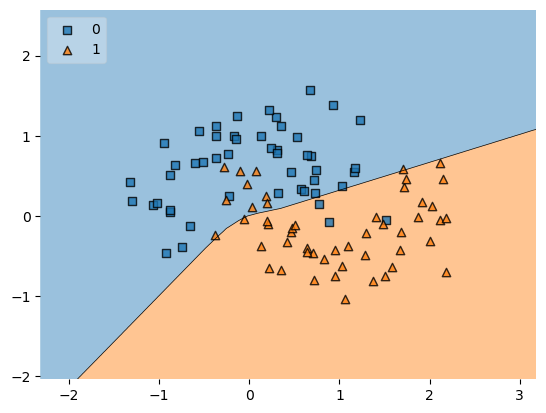

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)